<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Подготовка-расчетных-данных" data-toc-modified-id="Подготовка-расчетных-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка расчетных данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Описание проекта

В компании «Мегалайн» клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Для этого нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено:
 + 500 минут разговора 
 + 50 сообщений 
 + 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
 + минута разговора: 3 рубля
 + сообщение: 3 рубля
 + 1 Гб интернет-трафика: 200 рублей

 
**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено:
 + 3000 минут разговора
 + 1000 сообщений
 + 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
 + минута разговора: 1 рубль
 + сообщение: 1 рубль
 + 1 Гб интернет-трафика: 150 рублей

## Изучение данных

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st

Есть данные 500 пользователей «Мегалайна», в наличии несколько файлов:

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
display(calls.info())
display(calls.describe())
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Информация о **звонках**:
- **id** — уникальный номер звонка
- **call_date** — дата звонка
- **duration** — длительность звонка в минутах
- **user_id** — идентификатор пользователя, сделавшего звонок

In [4]:
display(internet.info())
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Информация об **интернет-сессиях**:
- **id** — уникальный номер сессии
- **mb_used** — объём потраченного за сессию интернет-трафика (в мегабайтах)
- **session_date** — дата интернет-сессии
- **user_id** — идентификатор пользователя

In [5]:
display(messages.info())
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Информация о **сообщениях**:
- **id** — уникальный номер сообщения
- **message_date** — дата сообщения
- **user_id** — идентификатор пользователя, отправившего сообщение


In [6]:
display(tariffs.info())
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Информация о **тарифах**:
- **tariff_name** — название тарифа
- **rub_monthly_fee** — ежемесячная абонентская плата в рублях
- **minutes_included** — количество минут разговора в месяц, включённых в абонентскую плату
- **messages_included** — количество сообщений в месяц, включённых в абонентскую плату
- **mb_per_month_included** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- **rub_per_minute** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- **rub_per_message** — стоимость отправки сообщения сверх тарифного пакета
- **rub_per_gb** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [7]:
display(users.info())
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Информация о **пользователях**:
- **user_id** — уникальный идентификатор пользователя
- **first_name** — имя пользователя
- **last_name** — фамилия пользователя
- **age** — возраст пользователя (годы)
- **reg_date** — дата подключения тарифа (день, месяц, год)
- **churn_date** — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- **city** — город проживания пользователя
- **tariff** — название тарифного плана

Данные о пользователях представленны пятью таблицами. Есть пропуски, ошибки и необходимо поменять формат некоторых столбцов.

## Предобработка данных

Приведем столбцы **reg_date, churn_date, message_date, session_date, call_date** к типу **datetime** :

In [8]:
columns_to_datetime = {'reg_date':users,
                       'churn_date' :users,
                       'message_date':messages,
                       'session_date':internet,
                       'call_date':calls}

for column, frame in columns_to_datetime.items():
    frame[column] = pd.to_datetime(frame[column],format = '%Y-%m-%d')

В столбце **churn_date** есть пропуски, но они никак не повлияют на дальнейший анализ, оставим как есть.

В столбце **duration** много звонков длительность 0 минут. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

В таблице с интернет трафиком есть лишний столбец, удалим его для дальнейшего удобства:

In [9]:
internet.drop(columns = ['Unnamed: 0'], axis = 1)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


## Подготовка расчетных данных

Добавим столбцы с месяцем, в котором происходит событие:

In [10]:
columns_add_month = {'message_date':messages,
                       'session_date':internet,
                       'call_date':calls}
for column, frame in columns_add_month.items():
    frame['month'] = frame[column].dt.month

Округлим значения времени звонков:

In [11]:
calls['duration'] = np.ceil(calls['duration'])

Создадим словарь с соответствием тарифа пользователю:

In [12]:
tarif_for_user = {}

def add_tarif_to_user(row):
    tarif_for_user[row[0]] = row[7]
    
users.apply(add_tarif_to_user, axis=1)
len(tarif_for_user)

500

Добавим в наши таблицы столбец с тарифом для каждого абонента: 

In [13]:
def add_tariff(row):
    return tarif_for_user[row]

for i in (calls, internet, messages):
    i['tariff'] = i['user_id'].apply(add_tariff)

Определим функцию для создания сводных таблиц:

In [14]:
def pivot_data(data, values, aggfunc):
    return data.pivot_table(index=['user_id', 'tariff', 'month'], values=values, aggfunc=aggfunc)

Рассчитаем для каждого пользователя по месяцам: количество сделанных звонков и израсходованных минут разговора; количество отправленных сообщений; объем израсходованного интернет-трафика; выручку с каждого пользователя.

In [15]:
#звонки
calls_by_month = pivot_data(calls, 'duration', aggfunc=['sum', 'count'])
calls_by_month.columns = ['minutes_calls', 'count_calls']
calls_by_month.head(15)

minutes_calls  count_calls
user_id tariff month                            
1000    ultra  5              159.0           22
               6              172.0           43
               7              340.0           47
               8              408.0           52
               9              466.0           58
               10             350.0           57
               11             338.0           43
               12             333.0           46
1001    smart  11             430.0           59
               12             414.0           63
1002    smart  6              117.0           15
               7              214.0           26
               8              289.0           42
               9              206.0           36
               10             212.0           33

In [16]:
#сообщения
messages_by_month = pivot_data(messages, 'id', aggfunc='count')
messages_by_month.columns = ['count_messages']
messages_by_month.head(15)

count_messages
user_id tariff month                
1000    ultra  5                  22
               6                  60
               7                  75
               8                  81
               9                  57
               10                 73
               11                 58
               12                 70
1002    smart  6                   4
               7                  11
               8                  13
               9                   4
               10                 10
               11                 16
               12                 12

In [17]:
#интернет-трафик
mb_by_month = pivot_data(internet, 'mb_used', aggfunc='sum')
mb_by_month.columns = ['mb_used']
mb_by_month.head(15)

mb_used
user_id tariff month          
1000    ultra  5       2253.49
               6      23233.77
               7      14003.64
               8      14055.93
               9      14568.91
               10     14702.49
               11     14756.47
               12      9817.61
1001    smart  11     18429.34
               12     14036.66
1002    smart  6      10856.82
               7      17580.10
               8      20319.26
               9      16691.08
               10     13888.25

Обьединим полученные таблицы с таблицей пользователей и посчитаем выручку для каждого пользователя по месяцам:

In [18]:
data=users.merge(calls_by_month.reset_index(), how='outer')
data=data.merge(messages_by_month.reset_index(), how='outer')
data=data.merge(mb_by_month.reset_index(), how='outer')
data.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,minutes_calls,count_calls,count_messages,mb_used
0,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,159.0,22.0,22.0,2253.49
1,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,172.0,43.0,60.0,23233.77
2,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,340.0,47.0,75.0,14003.64
3,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,408.0,52.0,81.0,14055.93
4,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,466.0,58.0,57.0,14568.91
5,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10.0,350.0,57.0,73.0,14702.49
6,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11.0,338.0,43.0,58.0,14756.47
7,1000,52.0,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12.0,333.0,46.0,70.0,9817.61
8,1001,41.0,NaT,Москва,Иван,Ежов,2018-11-01,smart,11.0,430.0,59.0,NaN,18429.34
9,1001,41.0,NaT,Москва,Иван,Ежов,2018-11-01,smart,12.0,414.0,63.0,NaN,14036.66


In [19]:
len(data['user_id'].unique())

500

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3222 entries, 0 to 3221
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3222 non-null   int64         
 1   age             3182 non-null   float64       
 2   churn_date      189 non-null    datetime64[ns]
 3   city            3182 non-null   object        
 4   first_name      3182 non-null   object        
 5   last_name       3182 non-null   object        
 6   reg_date        3182 non-null   datetime64[ns]
 7   tariff          3222 non-null   object        
 8   month           3214 non-null   float64       
 9   minutes_calls   3174 non-null   float64       
 10  count_calls     3174 non-null   float64       
 11  count_messages  2717 non-null   float64       
 12  mb_used         3203 non-null   float64       
dtypes: datetime64[ns](2), float64(6), int64(1), object(4)
memory usage: 352.4+ KB


Можем заполнить пропущенные значения нулями, т.к. пропуски в этих столбцах означают что пользователь не пользовался данными услугами в этом месяце и они не повлияют на дальнейщие рассчеты:

In [21]:
data = data.fillna(0)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3222 entries, 0 to 3221
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3222 non-null   int64  
 1   age             3222 non-null   float64
 2   churn_date      3222 non-null   object 
 3   city            3222 non-null   object 
 4   first_name      3222 non-null   object 
 5   last_name       3222 non-null   object 
 6   reg_date        3222 non-null   object 
 7   tariff          3222 non-null   object 
 8   month           3222 non-null   float64
 9   minutes_calls   3222 non-null   float64
 10  count_calls     3222 non-null   float64
 11  count_messages  3222 non-null   float64
 12  mb_used         3222 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 352.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,minutes_calls,count_calls,count_messages,mb_used
0,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra,5.0,159.0,22.0,22.0,2253.49
1,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra,6.0,172.0,43.0,60.0,23233.77
2,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra,7.0,340.0,47.0,75.0,14003.64
3,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra,8.0,408.0,52.0,81.0,14055.93
4,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra,9.0,466.0,58.0,57.0,14568.91


Теперь можем посчитать выручку по каждому пользователю, для этого вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану:

In [22]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Определим функцию для рассчета прибыли по этой формуле:

In [23]:
def total_income(row):    
    # произведем расчеты выручки для каждого тарифа
    # определим функцию по проверке тарифа и расчета сумм к оплате для каждого абонента
    def check(tariff):  
        # расчет количества минут сверх тарифа
        minutes_extra= row[9] - tariffs[tariffs['tariff_name'] == tariff].iloc[0, 2]
        if minutes_extra < 0:
            minutes_extra = 0            
        # расчет количества мегабайт сверх тарифа
        internet_extra = np.ceil((row[12] - tariffs[tariffs['tariff_name'] == tariff].iloc[0, 1]) / 1024)
        if internet_extra < 0:
            internet_extra = 0
        # расчет количества сообщений сверх тарифа
        messages_extra = row[11] - tariffs[tariffs['tariff_name'] == tariff].iloc[0, 0]
        if messages_extra < 0:
            messages_extra = 0
        return sum([minutes_extra * tariffs[tariffs['tariff_name'] == tariff].iloc[0, 6], 
                internet_extra * tariffs[tariffs['tariff_name'] == tariff].iloc[0, 4], 
                messages_extra * tariffs[tariffs['tariff_name'] == tariff].iloc[0, 5]])
    # создадим переменную, в которую сохраним значения суммы оплаты минут, сообщений и мб сверх тарифа
    result_income = check(row[7])
    return tariffs[tariffs['tariff_name'] == row[7]].iloc[0, 3] + result_income

Сохраним значения выручки для каждого пользователя в **total_income**:

In [24]:
data['total_income'] = data.apply(total_income, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3222 entries, 0 to 3221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3222 non-null   int64  
 1   age             3222 non-null   float64
 2   churn_date      3222 non-null   object 
 3   city            3222 non-null   object 
 4   first_name      3222 non-null   object 
 5   last_name       3222 non-null   object 
 6   reg_date        3222 non-null   object 
 7   tariff          3222 non-null   object 
 8   month           3222 non-null   float64
 9   minutes_calls   3222 non-null   float64
 10  count_calls     3222 non-null   float64
 11  count_messages  3222 non-null   float64
 12  mb_used         3222 non-null   float64
 13  total_income    3222 non-null   float64
dtypes: float64(7), int64(1), object(6)
memory usage: 377.6+ KB


Для удобства преобразуем столбцы к типу **int**:

In [25]:
columns = ['month', 'minutes_calls','count_calls', 'count_messages', 'total_income']
for column in columns:
    data[column] = data[column].astype(int)

In [26]:
data['mb_used']=data['mb_used']/1000
data.rename(columns = {'mb_used' : 'gb_used'}, inplace = True)

In [27]:
data.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,minutes_calls,count_calls,count_messages,gb_used,total_income
0,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra,5,159,22,22,2.25349,1950
1,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra,6,172,43,60,23.23377,1950
2,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra,7,340,47,75,14.00364,1950
3,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra,8,408,52,81,14.05593,1950
4,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra,9,466,58,57,14.56891,1950
5,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra,10,350,57,73,14.70249,1950
6,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra,11,338,43,58,14.75647,1950
7,1000,52.0,0,Краснодар,Рафаил,Верещагин,2018-05-25 00:00:00,ultra,12,333,46,70,9.81761,1950
8,1001,41.0,0,Москва,Иван,Ежов,2018-11-01 00:00:00,smart,11,430,59,0,18.42934,1150
9,1001,41.0,0,Москва,Иван,Ежов,2018-11-01 00:00:00,smart,12,414,63,0,14.03666,550


## Анализ данных

Посчитаем среднее, дисперсию и стандартное отклонение по минутам, сообщениям и траффику для каждого тарифа:

In [28]:
data_tariffs=data.pivot_table(index=['tariff'], values=['minutes_calls', 'count_messages', 'gb_used'], aggfunc=['mean','median','var','std'])
data_tariffs

mean                                  median            \
       count_messages    gb_used minutes_calls count_messages   gb_used   
tariff                                                                    
smart       33.354101  16.193857    417.560287             28  16.50411   
ultra       49.064581  19.350932    523.434914             38  19.25466   

                                var                                       std  \
       minutes_calls count_messages     gb_used  minutes_calls count_messages   
tariff                                                                          
smart            421     797.096978   34.666993   36343.346028      28.232906   
ultra            515    2286.094815  103.417611  101932.902578      47.813124   

                                 
          gb_used minutes_calls  
tariff                           
smart    5.887868    190.639309  
ultra   10.169445    319.269326


- Абоненты тарифа 'smart' тратят меньше минут на разговоры и меньше мегабайт интернет-трафика, а также отправляют меньше сообщений.
- Стандартные отклонения для пользователей тарифа 'ultra' больше, чем для 'smart', что означает, что пользователи тарифа 'ultra' используют тарифные опции с большим разбросом.
- Среднее и медианна довольно близки, а значит в распределении не так много выбросов.

In [29]:
data[data['tariff']=='smart'].describe()

,user_id,age,month,minutes_calls,count_calls,count_messages,gb_used,total_income
count,2231.000000,2231.000000,2231.00000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000
mean,1246.671000,46.458987,8.33931,417.560287,58.411026,33.354101,16.193857,1289.310175
std,146.167884,16.513943,2.92968,190.639309,25.987217,28.232906,5.887868,818.337124
min,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1121.000000,32.000000,6.00000,282.000000,40.000000,10.000000,12.625225,550.000000
50%,1241.000000,47.000000,9.00000,421.000000,60.000000,28.000000,16.504110,1019.000000
75%,1376.000000,62.000000,11.00000,545.000000,76.000000,51.000000,20.041285,1750.000000
max,1499.000000,75.000000,12.00000,1435.000000,198.000000,143.000000,38.552450,6770.000000


In [30]:
data[data['tariff']=='ultra'].describe()

,user_id,age,month,minutes_calls,count_calls,count_messages,gb_used,total_income
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,1262.870838,45.150353,8.200807,523.434914,72.948537,49.064581,19.350932,2069.424823
std,140.705780,18.816729,2.933788,319.269326,44.152564,47.813124,10.169445,375.161342
min,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,1143.000000,29.000000,6.000000,278.500000,40.000000,6.000000,11.576290,1950.000000
50%,1277.000000,44.000000,9.000000,515.000000,73.000000,38.000000,19.254660,1950.000000
75%,1381.000000,63.000000,11.000000,751.000000,103.000000,78.000000,26.809310,1950.000000
max,1495.000000,75.000000,12.000000,1673.000000,244.000000,224.000000,49.745690,4800.000000


- Пользователи тарифа "Smart" превышают лимит 15Гб и платят за дополнительные мегабайты чаще, чем в половине случаев. Пользователи "Ultra" используют интернет активнее (в среднем на 3Гб), но больше чем в 75% случаев не выходят за увеличенный лимит в 30Гб.

Построим гистограммы для звонков, сообщений и интернет-трафика для тарифов:

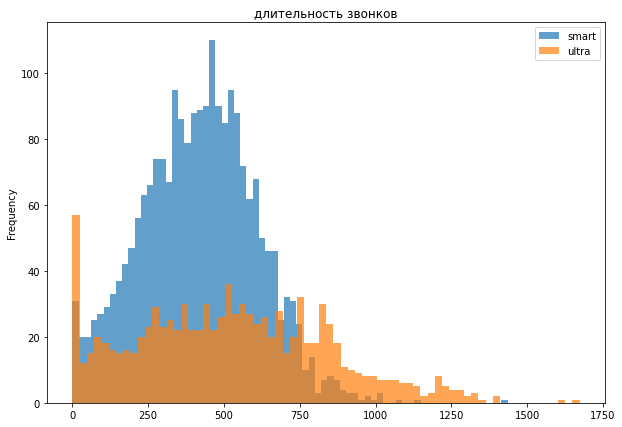

In [31]:
data[data['tariff'] == 'smart']['minutes_calls'].plot(kind='hist', title='длительность звонков', label='smart', bins=70, alpha=0.7, figsize=(10, 7))
data[data['tariff'] == 'ultra']['minutes_calls'].plot(kind='hist', title='длительность звонков', label='ultra', bins=70, alpha=0.7, figsize=(10, 7))
plt.legend(loc='upper right')
plt.show()

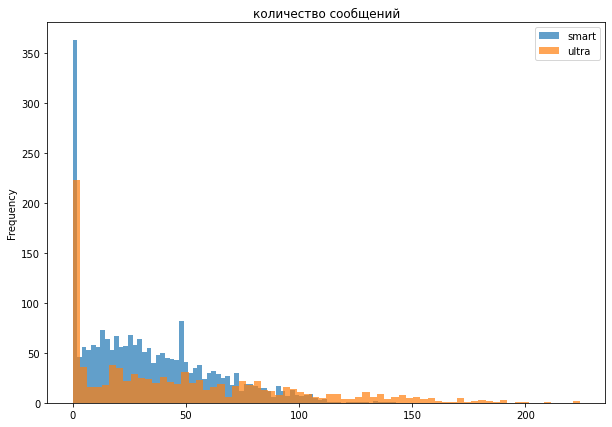

In [32]:
data[data['tariff'] == 'smart']['count_messages'].plot(kind='hist', title='количество сообщений', label='smart', bins=70, alpha=0.7, figsize=(10, 7))
data[data['tariff'] == 'ultra']['count_messages'].plot(kind='hist', title='количество сообщений', label='ultra', bins=70, alpha=0.7, figsize=(10, 7))
plt.legend(loc='upper right')
plt.show()

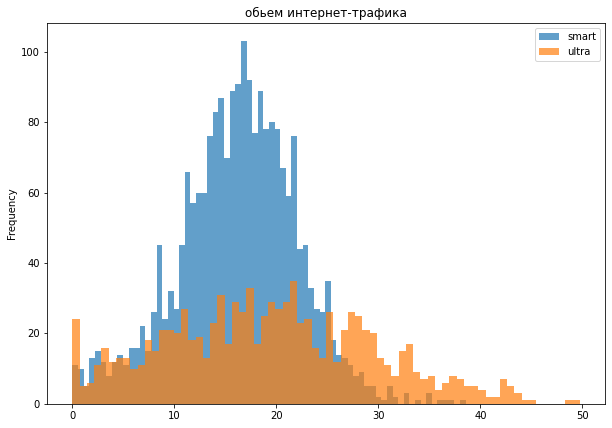

In [33]:
data[data['tariff'] == 'smart']['gb_used'].plot(kind='hist', title='обьем интернет-трафика', label='smart', bins=70, alpha=0.7, figsize=(10, 7))
data[data['tariff'] == 'ultra']['gb_used'].plot(kind='hist', title='обьем интернет-трафика', label='ultra', bins=70, alpha=0.7, figsize=(10, 7))
plt.legend(loc='upper right')
plt.show()


Распределения длительности звонков тяготеют к нормальным со смещением вправо для двух тарифов.
Распределение интернет траффика для тарифа 'smart' выглядит нормально, для тарифа 'ultra' можно наблюдать смещение вправо.
Распределение количества сообщений выглядит логнормальным.Пользователей, отправляющих много сообщений, мало.

Пользователи **smart** в основном потребляют:
от 350 до 550 минут;
от 12 до 22 гб;
до 60 сообщений.

Пользователи **ultra** в основном потребляют:
от 250 до 850 минут;
от 10 до 30 гб;
до 100 сообщений.

In [34]:
data_income=data.pivot_table(index=['tariff'], values=['total_income'], aggfunc=['mean','median','var','std'])
data_income

,mean,median,var,std
,total_income,total_income,total_income,total_income
tariff,,,,
smart,1289.310175,1019,669675.649040,818.337124
ultra,2069.424823,1950,140746.032474,375.161342


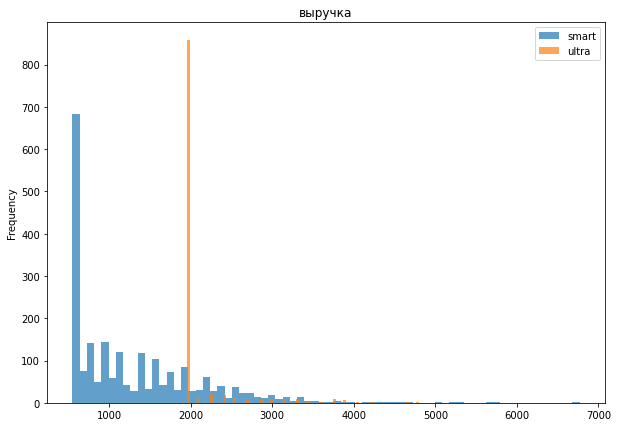

In [35]:
data[data['tariff'] == 'smart']['total_income'].plot(kind='hist', title='выручка', label='smart', bins=70, alpha=0.7, figsize=(10, 7))
data[data['tariff'] == 'ultra']['total_income'].plot(kind='hist', title='выручка', label='ultra', bins=70, alpha=0.7, figsize=(10, 7))
plt.legend(loc='upper right')
plt.show()

Распределения выручки говорят о том, что пользователи тарифа **'smart'** чаще выходят за границы пакетов, принося прибыль помимо абонентской платы.

## Проверка гипотез

**Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**

- Нулевая гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.

- Альтернативная гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны.


Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам для независимых выборок:

In [36]:
alpha = .05 #зададим 5% уровень значимости
result = st.ttest_ind(data[data['tariff'] == 'smart']['total_income'], 
                      data[data['tariff'] == 'ultra']['total_income'])

print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.7629500022347535e-161
Отвергаем нулевую гипотезу


Уровень значимости статистики разности средних  очень мал. Можем отвергнуть нулевую гипотезу, а значит вероятнее всего средние выручки для двух тарифов не равны.

**Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

- Нулевая гипотеза - средняя выручка пользователей из Москвы и пользователей из других регионов равны.

- Альтернативная гипотеза - средняя выручка пользователей из Москвы и пользователей из других регионов различны.

In [37]:
alpha = .05 #зададим 5% уровень значимости
result = st.ttest_ind(data.query('city == "Москва"')['total_income'], 
                      data.query('city != "Москва"')['total_income'])

print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5636048697654608
Не получилось отвергнуть нулевую гипотезу


Вероятность ошибки при отклонении этой гипотезы около 46%, поэтому мы не можем отвергнуть нулевую гипотезу. С высокой вероятностью средняя выручка пользователей из Москвы и пользователей из других регионов равны.

## Выводы

После обработки и анализа данных 500 пользователей мобильного оператора можно сделать следующие выводы:

- Основные различия между пользовательским поведением - значительное увеличение потребления интернет-трафика на тарифе 'ultra'. Длительность звонков и отправка сообщений значительно не различаются.
- Пользователи тарифа 'smart' в половине случаев не укладываются в лимиты звонков и трафика, но даже с учетом оплаты сверх лимита тратят в среднем меньше суммы абонентской платы тарифа 'ultra'.
- Тариф 'ultra' более выгоден для мобильного оператора. Меньше 25% пользователей превышают лимиты, но средняя выручка выше за счет высокой абонентской платы.

**Рекламный бюджет целесообразно перераспределить в пользу тарифа 'ultra', несмотря на то, что его абоненты не покупают дополнительные минуты и сообщения, в отличие от абонентов тарифа 'smart'. Так же можно заметить, что медианное и среднее значение дохода у абонентов тарифа 'ultra' выше.**